# Hierarchical Clustering-Agglomerative:
it is the bottom up approach.

In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

# On a randomly generated dataset
n_samples: The total number of points equally divided among clusters:50 (Choose a number from 10-1500)
centers: The number of centers to generate, or the fixed center locations.(choose x,y have 1-10 centers)
cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters(Choose a number between 0.5-1.5)

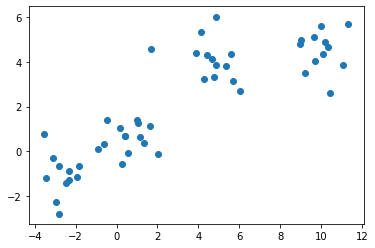

In [2]:
np.random.seed(0)
X, y = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='o') 
plt.show()

In [3]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average').fit(X,y)

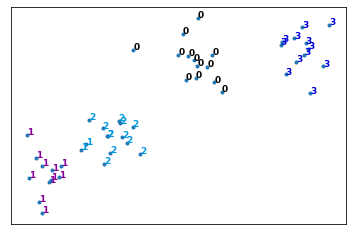

In [5]:
plt.figure(figsize=(6,4))


x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

# Get the average distance for X.
X = (X - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X.shape[0]):
    # Replace the data points with their respective cluster value 
    plt.text(X[i, 0], X[i, 1], str(y[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])



# Display the plot of the original data before clustering
plt.scatter(X[:, 0], X[:, 1], marker='.')
# Display the plot
plt.show()


In [7]:
#distance matrix contains the distance from each point to every other point of a dataset .
# the distance values are symmetric, with a diagonal of 0's.
dist_mat=distance_matrix(X,X) 
dist_mat

array([[0.        , 0.89221967, 0.08362736, ..., 0.38011012, 0.78910769,
        0.77496568],
       [0.89221967, 0.        , 0.93347579, ..., 0.55895655, 0.18458274,
        0.12494651],
       [0.08362736, 0.93347579, 0.        , ..., 0.39635751, 0.84286948,
        0.8202518 ],
       ...,
       [0.38011012, 0.55895655, 0.39635751, ..., 0.        , 0.5119048 ,
        0.46018236],
       [0.78910769, 0.18458274, 0.84286948, ..., 0.5119048 , 0.        ,
        0.10318462],
       [0.77496568, 0.12494651, 0.8202518 , ..., 0.46018236, 0.10318462,
        0.        ]])

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

C:\Users\kaout\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


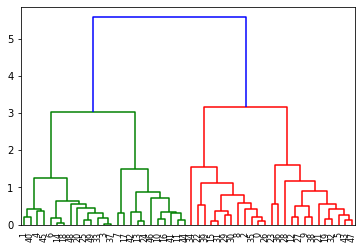

In [13]:
Z = hierarchy.linkage(dist_mat, 'complete')
dendro=hierarchy.dendrogram(Z)
plt.savefig('dendrogram.png')

## The linkage criteria determines the metric used for the merge strategy:

* Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
* Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
* Average linkage minimizes the average of the distances between all observations of pairs of clusters.

C:\Users\kaout\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


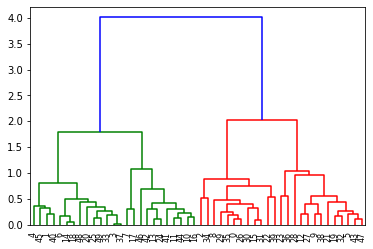

In [15]:
Z1 = hierarchy.linkage(dist_mat, 'average')
dendro = hierarchy.dendrogram(Z1)

# Clustering on a dataset
an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

* our objective is use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

In [79]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cars_clus.csv')
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


# DATA CLEANING

In [51]:
df.dtypes

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object

In [52]:
df.isnull().sum()

manufact     2
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [83]:
df.iloc[:,2:-1] =df.iloc[:,2:-1].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,0.0,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0
113,Volkswagen,Jetta,83.721,13.240,0.0,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0
114,Volkswagen,Passat,51.102,16.725,0.0,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0
115,Volkswagen,Cabrio,9.569,16.575,0.0,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0


In [84]:
X1=df.iloc[:,6:14]
X1

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0
...,...,...,...,...,...,...,...,...
112,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0
113,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0
114,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0
115,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1= scaler.fit_transform(X1)
X1

array([[-1.18851919e+00, -7.07601054e-01, -7.64272933e-01,
        -1.10660259e+00, -1.11075197e+00, -1.15208399e+00,
        -1.22085320e+00,  8.85241473e-01],
       [ 1.43988978e-01,  7.49353912e-01,  9.64937227e-02,
        -2.53125313e-01,  3.75766612e-01,  3.24491224e-01,
        -1.62192282e-01,  2.01138089e-01],
       [ 4.29526444e-01,  4.92244212e-01,  9.07360862e-01,
         5.98163564e-02,  6.44065088e-01,  8.84513487e-01,
         4.95399020e-02, -4.82965295e-01],
       [-1.18851919e+00, -5.36194588e-01, -5.89624626e-01,
        -8.50559409e-01, -7.04678604e-01, -5.48336267e-01,
        -3.73924466e-01,  6.57207012e-01],
       [-2.36727642e-01,  3.20837745e-01,  1.71342997e-01,
         1.39693076e+00,  3.10504820e-01,  3.98488160e-01,
         1.81872517e-01, -4.82965295e-01],
       [ 1.09578053e+00,  2.20630888e+00,  7.07762797e-01,
         7.99496666e-01,  7.60086051e-01,  9.71964411e-01,
         1.55813171e+00, -7.10999756e-01],
       [-2.36727642e-01,  2.008532

In [87]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(X1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [88]:
distance_matrix(X1,X1)

array([[0.        , 3.36844337, 4.35035558, ..., 1.58664043, 1.41561202,
        1.09846776],
       [3.36844337, 0.        , 1.34220416, ..., 2.24296391, 3.83363452,
        3.63938637],
       [4.35035558, 1.34220416, 0.        , ..., 3.08960352, 4.66696666,
        4.48597837],
       ...,
       [1.58664043, 2.24296391, 3.08960352, ..., 0.        , 2.3320982 ,
        2.01293863],
       [1.41561202, 3.83363452, 4.66696666, ..., 2.3320982 , 0.        ,
        0.79207424],
       [1.09846776, 3.63938637, 4.48597837, ..., 2.01293863, 0.79207424,
        0.        ]])

In [90]:
df['cluster_'] = agglom.labels_
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,4
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,1
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,1
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,4
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,0.0,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0,4
113,Volkswagen,Jetta,83.721,13.240,0.0,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0,4
114,Volkswagen,Passat,51.102,16.725,0.0,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0,4
115,Volkswagen,Cabrio,9.569,16.575,0.0,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0,4


In [92]:
df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()

C:\Users\kaout\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   211.428571  4.342857  17.142857  28.592571
1        0.0   217.129032  3.441935  23.864516  33.018097
         1.0   183.636364  3.427273  20.090909  26.637545
2        1.0   143.500000  2.850000  21.250000  18.946250
3        0.0   450.000000  8.000000  16.000000  69.725000
4        0.0   139.711111  2.195556  27.244444  17.964400
         1.0   149.714286  2.657143  22.000000  18.551571
5        0.0    55.000000  1.000000  45.000000   9.235000

we have 3 main clusters with the majority of vehicles in those.

**Cars**:

-   Cluster 1: with almost high mpg, and low in horsepower.
-   Cluster 2: with good mpg and horsepower, but higher price than average.
-   Cluster 3: with min mpg, high horsepower, highest price.

**Trucks**:

-   Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
-   Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
-   Cluster 3: with good mpg and horsepower, low price.
